In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [3]:
data = pd.read_csv(path + "/Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
X = data.drop(["Survived"],axis= 1)
y = data["Survived"]

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


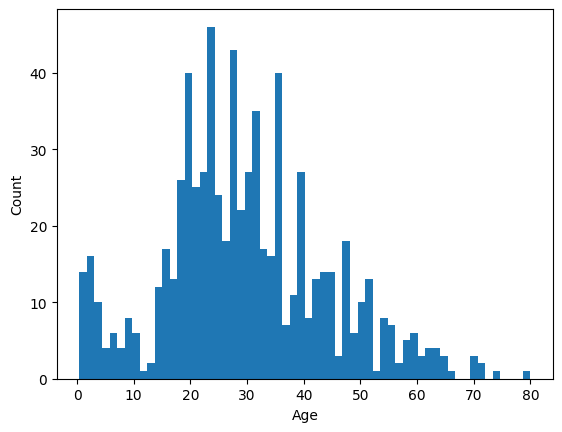

In [6]:
#plt.hist(z.values,z.index,bins=20)
plt.hist(X['Age'].dropna(), bins=60)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

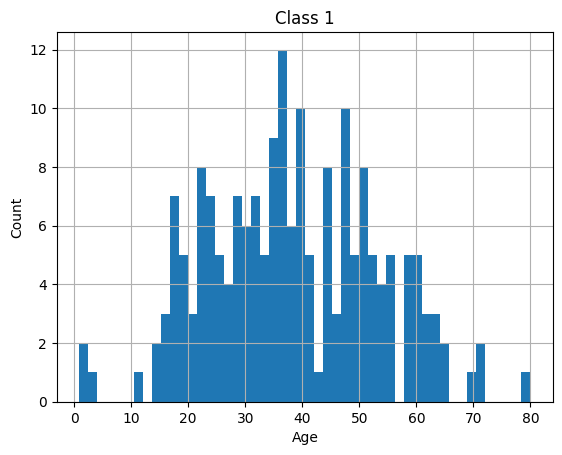

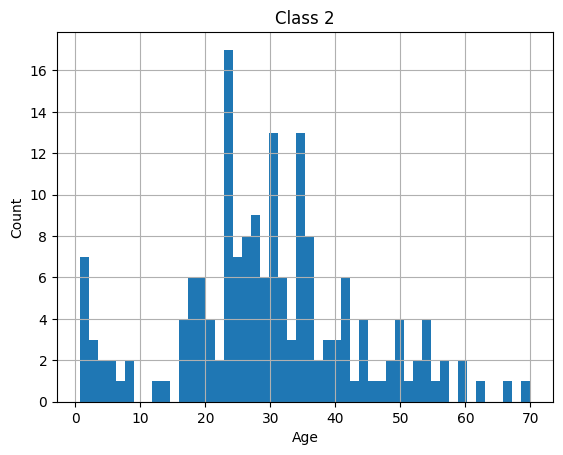

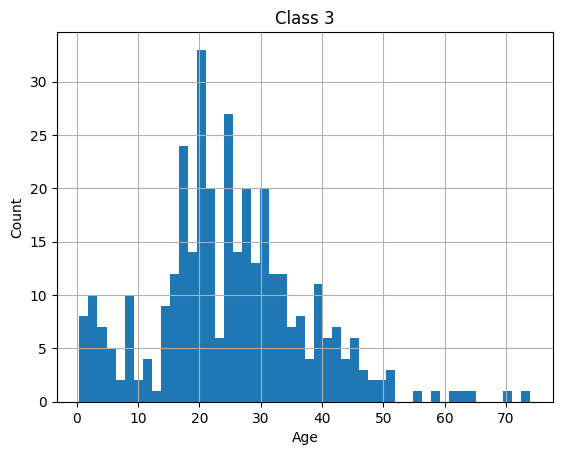

In [7]:
for i in range(1,4):
   X["Age"][X["Pclass"] == i].hist(bins=50)
   plt.xlabel("Age")
   plt.ylabel("Count")
   plt.title("Class " + str(i))
   plt.show()

In [ ]:
for i in range(1,4):
   print("class",i," ",X["Age"][X["Pclass"] == i].median())

class 1   37.0
class 2   29.0
class 3   24.0


In [94]:
X["Embarked"].fillna("S",inplace=True)
X["Age"].fillna(X["Age"].median(),inplace=True)
X["Cabin"].fillna("M",inplace=True)
X["Cabin"] = X["Cabin"].str[0]

<ipython-input-94-d6c8e2bc0dfa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Embarked"].fillna("S",inplace=True)
<ipython-input-94-d6c8e2bc0dfa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [95]:
titles = []
names = X["Name"]
for i in names:
  place , first = i.split(", ",1)
  title , f = first.split(". ",1)
  titles.append(title)
titles = np.array(titles)

index = np.where(np.isin(titles,['Capt','Col','Major']))
titles[index] = "Army"
index = np.where(np.isin(titles,['Don','Sir','the Countess','Master','Jonkheer']))
titles[index] = "Noble"
index = np.where(np.isin(titles,['Miss', 'Mlle', 'Mme','Lady','Mrs',"Ms"]))
titles[index] = "civil_W"
print(np.unique(titles,return_counts= True))
X["Titles"] = titles

(array(['Army', 'Dr', 'Mr', 'Noble', 'Rev', 'civil_W'], dtype='<U12'), array([  5,   7, 517,  44,   6, 312]))


In [96]:
bins = [0,10,20,30,40,50,60,70,80]
X['Age_bin'] = pd.cut(X['Age'], bins)
# Group by 'Ticket' and sum the 'Fare' for each ticket
ticket_count = X.groupby('Ticket')['Ticket'].count()
X['Ticket_count'] = X['Ticket'].map(ticket_count)
X['Fare_Per_Ticket'] = X["Fare"]/X["Ticket_count"]
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Age_bin,Ticket_count,Fare_Per_Ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,civil_W,"(30, 40]",1,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,civil_W,"(20, 30]",1,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,civil_W,"(30, 40]",2,26.5500
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,Rev,"(20, 30]",1,13.0000
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,civil_W,"(10, 20]",1,30.0000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,M,S,civil_W,"(20, 30]",2,11.7250
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr,"(20, 30]",1,30.0000


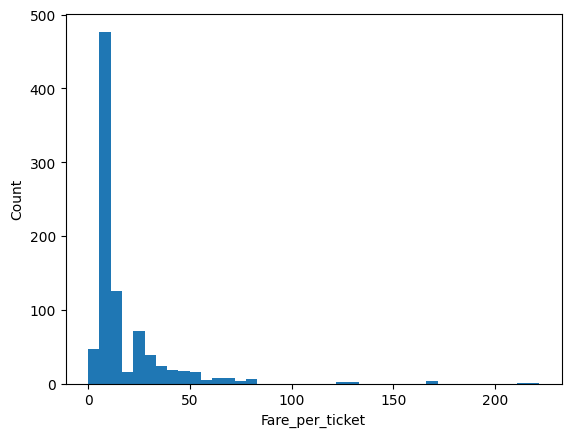

In [86]:
plt.hist(X['Fare_Per_Ticket'], bins=40)
plt.xlabel("Fare_per_ticket")
plt.ylabel("Count")
plt.show()

In [97]:
bins = [0,5,10,20,30,40,50,60,70,230]
X['Fare_bin'] = pd.cut(X['Fare_Per_Ticket'], bins)
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [ ]:
X = X.drop(["Name", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "PassengerId"], axis=1)

In [106]:
X.set_index("PassengerId",inplace=True)
X

,Pclass,Sex,Cabin,Embarked,Titles,Age_bin,Fare_bin,Family_size
PassengerId,,,,,,,,
1,3,male,M,S,Mr,"(20, 30]","(5, 10]",2
2,1,female,C,C,civil_W,"(30, 40]","(70, 230]",2
3,3,female,M,S,civil_W,"(20, 30]","(5, 10]",1
4,1,female,C,S,civil_W,"(30, 40]","(20, 30]",2
5,3,male,M,S,Mr,"(30, 40]","(5, 10]",1
...,...,...,...,...,...,...,...,...
887,2,male,M,S,Rev,"(20, 30]","(10, 20]",1
888,1,female,B,S,civil_W,"(10, 20]","(20, 30]",1
889,3,female,M,S,civil_W,"(20, 30]","(10, 20]",4


In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X["Sex"] = le.fit_transform(X["Sex"])
X["Titles"] = le.fit_transform(X["Titles"])
X["Cabin"] = le.fit_transform(X["Cabin"])
X["Embarked"] = le.fit_transform(X["Embarked"])
X["Age_bin"] = le.fit_transform(X["Age_bin"])
X["Fare_bin"] = le.fit_transform(X["Fare_bin"])
X

,Pclass,Sex,Cabin,Embarked,Titles,Age_bin,Fare_bin,Family_size
PassengerId,,,,,,,,
1,3,1,7,2,2,"(20, 30]","(5, 10]",2
2,1,0,2,0,5,"(30, 40]","(70, 230]",2
3,3,0,7,2,5,"(20, 30]","(5, 10]",1
4,1,0,2,2,5,"(30, 40]","(20, 30]",2
5,3,1,7,2,2,"(30, 40]","(5, 10]",1
...,...,...,...,...,...,...,...,...
887,2,1,7,2,4,"(20, 30]","(10, 20]",1
888,1,0,1,2,5,"(10, 20]","(20, 30]",1
889,3,0,7,2,5,"(20, 30]","(10, 20]",4


In [110]:
X

,Pclass,Sex,Cabin,Embarked,Titles,Age_bin,Fare_bin,Family_size
PassengerId,,,,,,,,
1,3,1,7,2,2,2,1,2
2,1,0,2,0,5,3,8,2
3,3,0,7,2,5,2,1,1
4,1,0,2,2,5,3,3,2
5,3,1,7,2,2,3,1,1
...,...,...,...,...,...,...,...,...
887,2,1,7,2,4,2,2,1
888,1,0,1,2,5,1,3,1
889,3,0,7,2,5,2,2,4


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [118]:
X_processed = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Display the first few rows of the updated DataFrame
print(X_processed.head())

             Pclass  Cabin  Titles  Age_bin  Fare_bin  Family_size  Sex_0  \
PassengerId                                                                 
1                 3      7       2        2         1            2  False   
2                 1      2       5        3         8            2   True   
3                 3      7       5        2         1            1   True   
4                 1      2       5        3         3            2   True   
5                 3      7       2        3         1            1  False   

             Sex_1  Embarked_0  Embarked_1  Embarked_2  
PassengerId                                             
1             True       False       False        True  
2            False        True       False       False  
3            False       False       False        True  
4            False       False       False        True  
5             True       False       False        True  


In [126]:
scalar = preprocessing.StandardScaler()
X_processed = scalar.fit_transform(X_processed)
X_processed

array([[ 0.82737724,  0.51129323, -0.76228938, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.91449093,  1.32755627, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.51129323,  1.32755627, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.51129323,  1.32755627, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.91449093, -0.76228938, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.51129323, -0.76228938, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

